# **Project: Customer Segmentation and Personality Analysis**

## **IMPORT THE LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# **EDA**
#Read and Pre-process the data

In [2]:
data=pd.read_excel("marketing_campaign1 (1).xlsx")

In [3]:
data.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

## Data Dimensions

In [5]:
data.shape

(2240, 29)

## Non-Null Count and Data Types

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

There are missing values in the column income

The data type of the column year_birth should be in datetime format, here it is given as int

## Converting column Year_Birth to DateTime format

In [7]:
data['Year_Birth'] = pd.to_datetime(data['Year_Birth'], format ='%Y')

##Missing values

In [8]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

###24 missing values in the column income

##Checking for skewness

In [9]:
data['Income'].skew()

6.763487372811116

###Since the data set is skewed, we should replace the missing values with median

##Imputing the missing values

In [10]:
data['Income'].fillna(data['Income'].median(), inplace = True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   datetime64[ns]
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

##Unique Values

In [12]:
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

##Value Counts

In [13]:
columns=['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Complain']
for col in columns:
    print(f"Value counts for column '{col}':")
    print(data[col].value_counts())
    print()

Value counts for column 'Education':
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Value counts for column 'Marital_Status':
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Value counts for column 'Kidhome':
0    1293
1     899
2      48
Name: Kidhome, dtype: int64

Value counts for column 'Teenhome':
0    1158
1    1030
2      52
Name: Teenhome, dtype: int64

Value counts for column 'Complain':
0    2219
1      21
Name: Complain, dtype: int64



##Duplicated Rows

In [14]:
data.duplicated().sum()

0

#Data Understanding

##Summary Statistics

In [15]:
data.describe()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


##Feature Transformation

###Creating new columns like Age, Year joined, Month joined etc

In [16]:
from datetime import date
from datetime import datetime
data['Age'] = datetime.now().year - data["Year_Birth"].dt.year
data['Total_yearCust'] = datetime.now().year - (data['Dt_Customer'].dt.year)
data['Year_Joined'] = data['Dt_Customer'].dt.year
data['Month_Joined'] = data['Dt_Customer'].dt.strftime("%B")

In [17]:
#Total Expenses made
data['Total_Expenses'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
#Total accepted campaign
data['Total_Acc_Cmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']
# Total number of purchases made
data['TotalNumPurchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases']
#Total number of children
data["children"]=data["Kidhome"]+data["Teenhome"]

##Correlation Analysis

In [18]:
data[['Income', 'Total_Expenses', 'Total_Acc_Cmp',"TotalNumPurchases",'Recency']].corr()

,Income,Total_Expenses,Total_Acc_Cmp,TotalNumPurchases,Recency
Income,1.000000,0.664775,0.287109,0.563450,-0.004061
Total_Expenses,0.664775,1.000000,0.456206,0.753903,0.020433
Total_Acc_Cmp,0.287109,0.456206,1.000000,0.258045,-0.088962
TotalNumPurchases,0.563450,0.753903,0.258045,1.000000,0.005740
Recency,-0.004061,0.020433,-0.088962,0.005740,1.000000


###Income with Total_Expenses and TotalNumPurchases are having a strong positive correlation.

In [19]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,Age,Total_yearCust,Year_Joined,Month_Joined,Total_Expenses,Total_Acc_Cmp,TotalNumPurchases,children
0,5524,1957-01-01,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,11,1,67,12,2012,September,1617,1,25,0
1,2174,1954-01-01,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,11,0,70,10,2014,March,27,0,6,2
2,4141,1965-01-01,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,11,0,59,11,2013,August,776,0,21,0
3,6182,1984-01-01,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,11,0,40,10,2014,February,53,0,8,1
4,5324,1981-01-01,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,11,0,43,10,2014,January,422,0,19,1


##Droping Unwanted Columns

In [20]:
data2=data.copy()
data2.drop(['ID' ,'Year_Birth','Dt_Customer','Z_CostContact','Z_Revenue'], axis=1, inplace=True)

In [21]:
data2.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Complain,Response,Age,Total_yearCust,Year_Joined,Month_Joined,Total_Expenses,Total_Acc_Cmp,TotalNumPurchases,children
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,1,67,12,2012,September,1617,1,25,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,70,10,2014,March,27,0,6,2
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,59,11,2013,August,776,0,21,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,40,10,2014,February,53,0,8,1
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,43,10,2014,January,422,0,19,1


In [22]:
data2.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Total_yearCust', 'Year_Joined',
       'Month_Joined', 'Total_Expenses', 'Total_Acc_Cmp', 'TotalNumPurchases',
       'children'],
      dtype='object')

# Data visualization

Text(0.5, 1.0, 'Age')

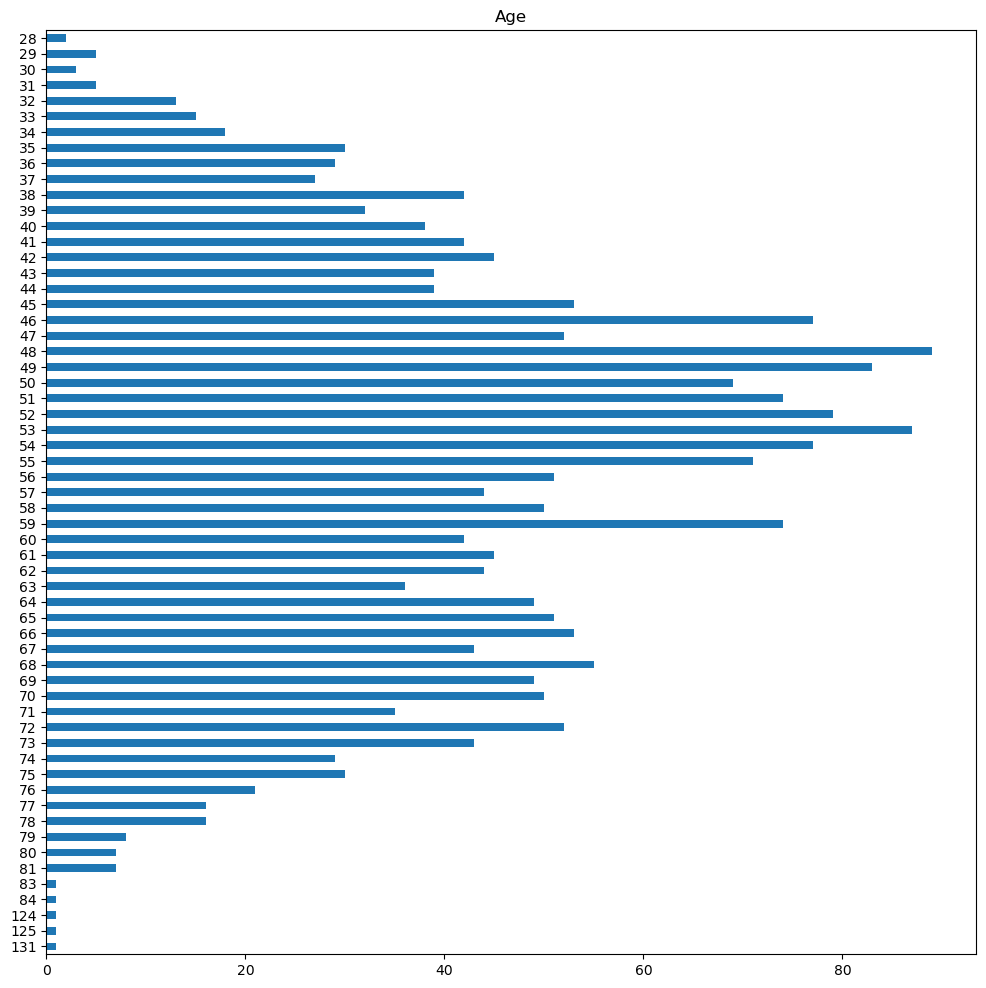

In [23]:
plt.figure(figsize=(12,12))
data2['Age'].value_counts().sort_index(ascending=False).plot(kind='barh')
plt.title('Age')

###We can see from the age graph that most of the customers are from the range of 43–60 years old.

Text(0.5, 1.0, 'Income')

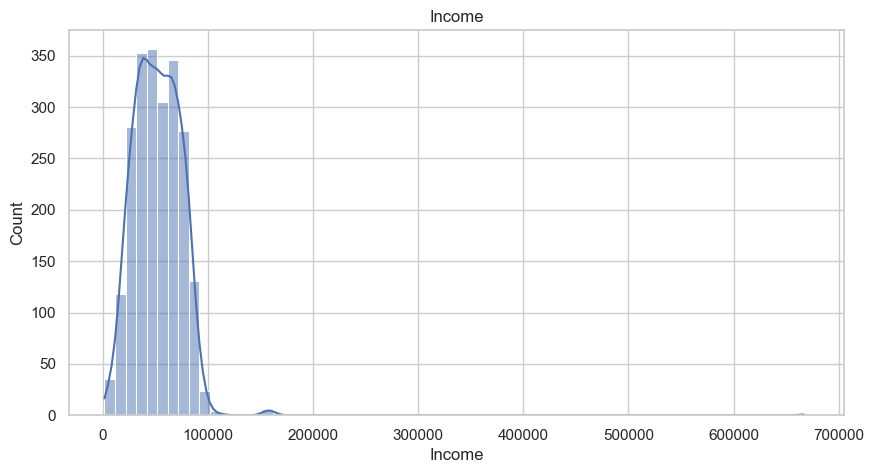

In [24]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
ax = sns.histplot(data=data, x='Income', binwidth=10000, kde=True)
ax.set_title('Income')

### The above histogram gives us an idea about how the data is distributed across different values or bins.
### It allows us to visually identify whether the data is positively skewed (tail to the right), negatively skewed (tail to the left), or approximately symmetric.
### Here, we can see that, it is approximately symmetric, normally distributed

Text(0.5, 1.0, 'Total_Expenses')

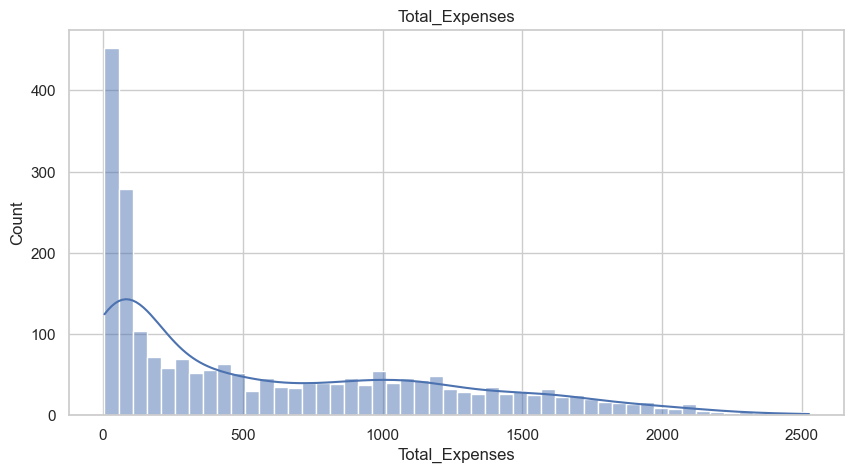

In [25]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
ax = sns.histplot(data=data2, x='Total_Expenses', kde=True,bins=50)
ax.set_title('Total_Expenses')

### Here, we can see that, Tota_Expenses is positively skewed(tail towards right side)

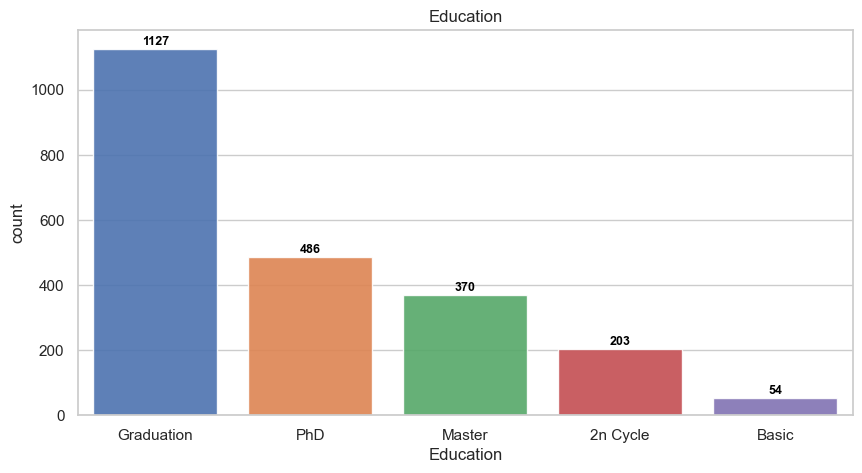

In [26]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
ax = sns.countplot(data=data, x='Education', saturation=1, alpha=0.9, palette='deep', order=data['Education'].value_counts().index)
ax.set_title('Education')
for p in ax.patches:
    number = '{}'.format(p.get_height().astype('int64'))
    ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
    xytext=(0,5), textcoords='offset points', color='black', fontweight='semibold', fontsize=9)

### Most of the people have completed their Graduations and only 54 people have did basic eduaction.

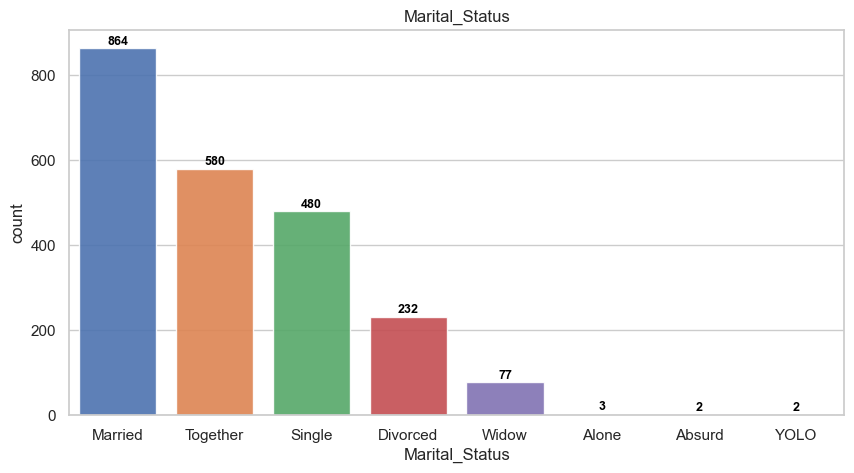

In [27]:
plt.figure(figsize=(10, 5))
sns.set(style='whitegrid')
ax = sns.countplot(data=data, x='Marital_Status', saturation=1, alpha=0.9, palette='deep', order=data['Marital_Status'].value_counts().index)
ax.set_title('Marital_Status')
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
  xytext=(0,5), textcoords='offset points', color='black', fontweight='semibold', fontsize=9)

### Married and Together people are the most, rest category count is less than 500.

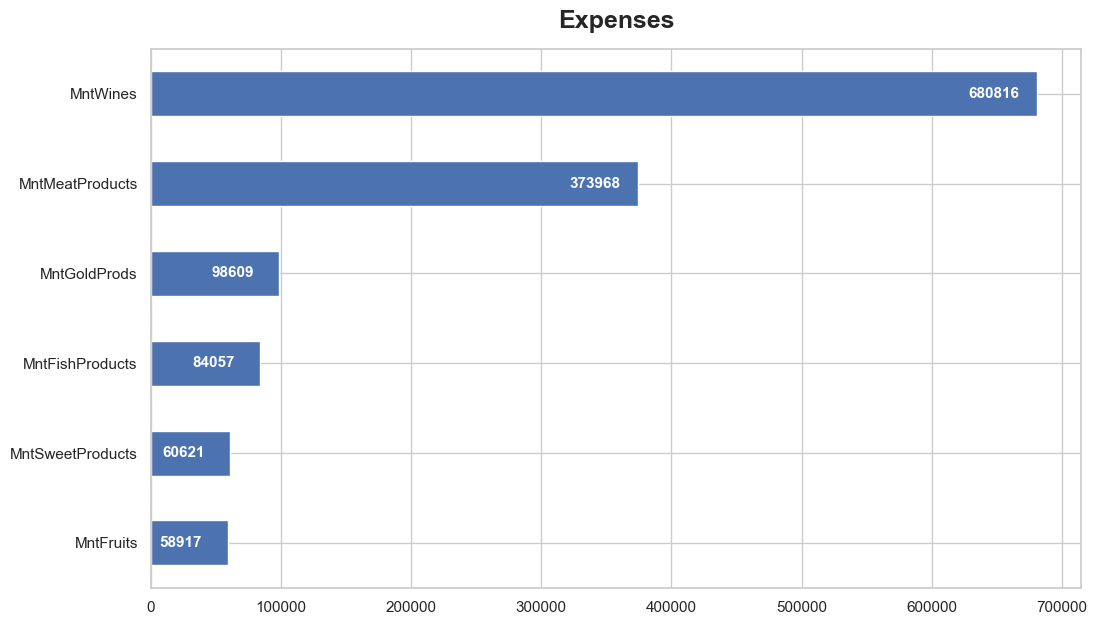

In [28]:
plt.figure(figsize=(12,7))
ax = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Expenses', pad=15, fontsize=18, fontweight='semibold')
rects = ax.patches
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    plt.annotate('{}'.format(x_value), (x_value, y_value), xytext=(-49, 0),
    textcoords='offset points', va='center', ha='left', color = 'white', fontsize=11, fontweight='semibold')


###Most of the expenses are made on the purchase of wine, while the least are spent on fruits.

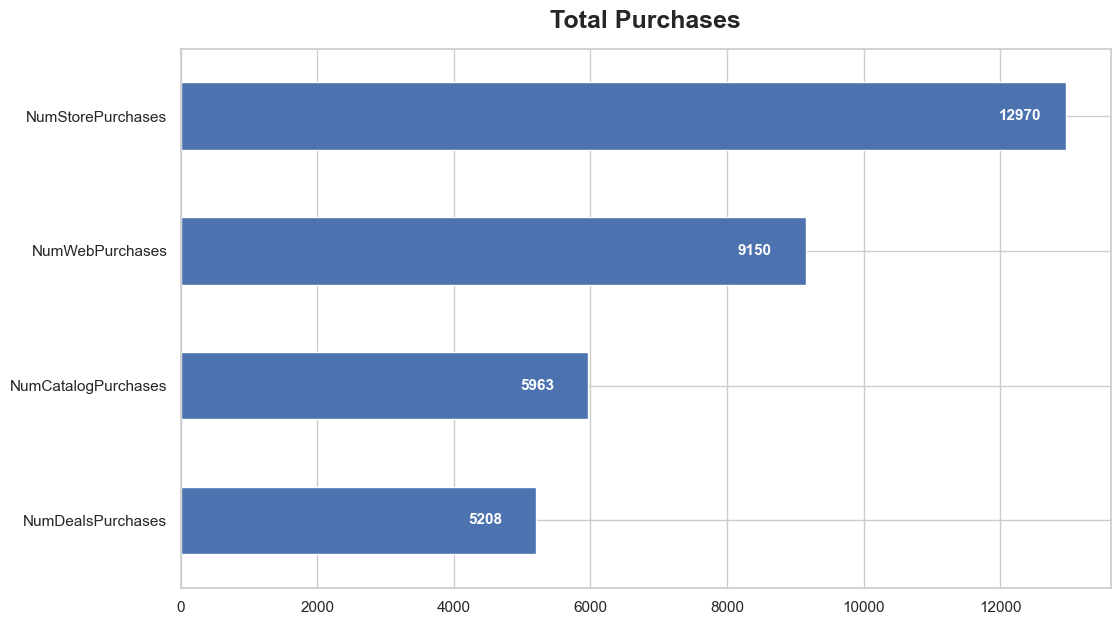

In [29]:
plt.figure(figsize=(12,7))
ax = data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Total Purchases', pad=15, fontsize=18, fontweight='semibold')
rects = ax.patches
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    plt.annotate('{}'.format(x_value), (x_value, y_value), xytext=(-49, 0),
    textcoords='offset points', va='center', ha='left', color = 'white', fontsize=11, fontweight='semibold')


###About 12,970 purchases are made directly in stores, while 5,208 are made through deals.

Text(0, 0.5, 'Total Expenses')

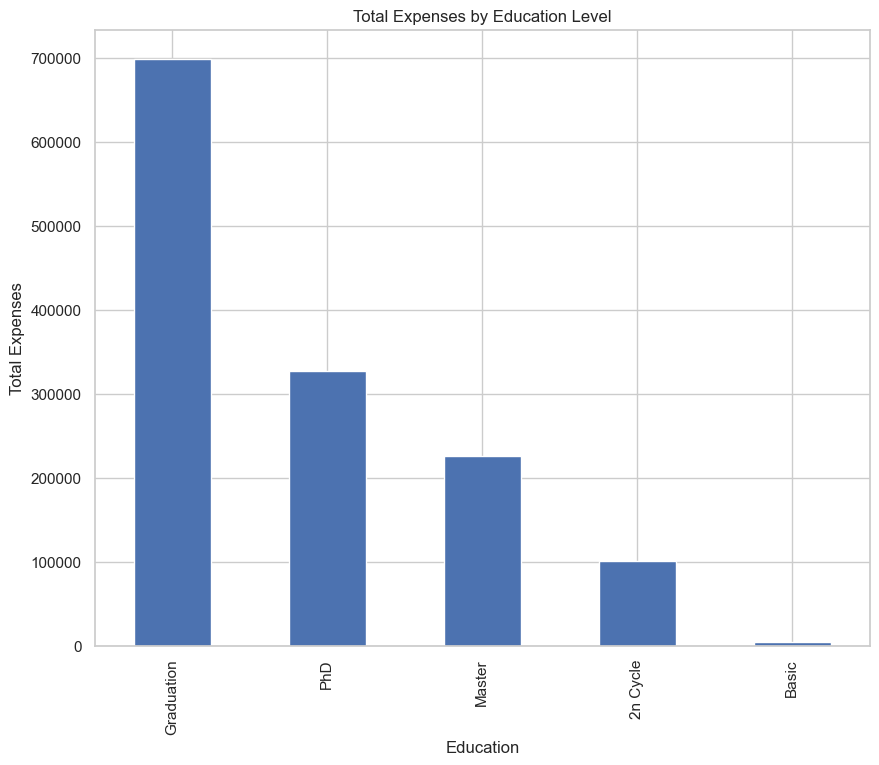

In [30]:
ax = data[['Education', 'Total_Expenses']].groupby('Education').sum().sort_values(by='Total_Expenses', ascending=False).plot(kind='bar', figsize=(10,8), legend=None)
ax.set_title('Total Expenses by Education Level')
ax.set_ylabel('Total Expenses')

###Most of the expenses are made by households with graduates, while the least is made by households where individuals have only completed basic education.

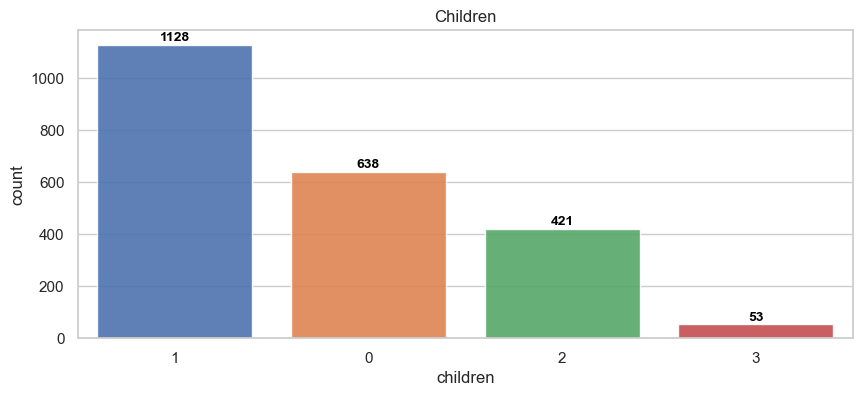

In [31]:
plt.figure(figsize=(10, 4))
sns.set(style='whitegrid')
ax = sns.countplot(data=data2, x='children', saturation=1, alpha=0.9, palette='deep', order=data['children'].value_counts().index)
ax.set_title('Children')
for p in ax.patches:
    number = '{}'.format(p.get_height().astype('int64'))
    ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
    xytext=(0,5), textcoords='offset points', color='black', fontweight='semibold', fontsize=10)

### About 1128  households have atleast 1 child, about 638 households have no children and about 53 households have 3 children.

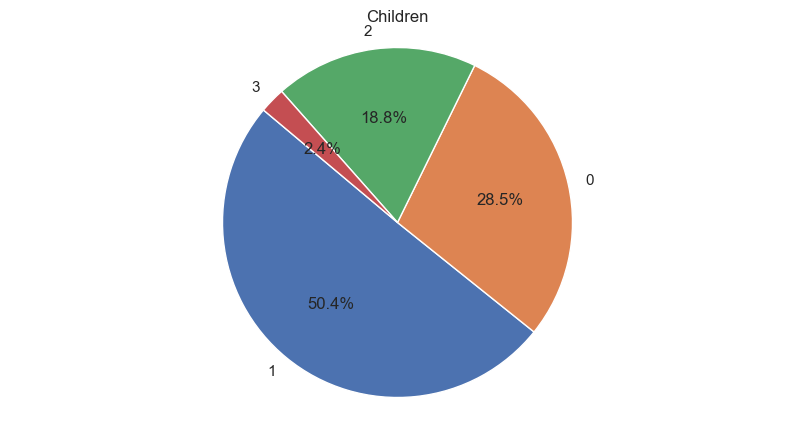

In [32]:
counts = data2['children'].value_counts()
plt.figure(figsize=(10, 5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('deep', len(counts)))  # Create the pie chart
plt.title('Children')
plt.axis('equal')
plt.show()

Text(0, 0.5, 'Total Expenses')

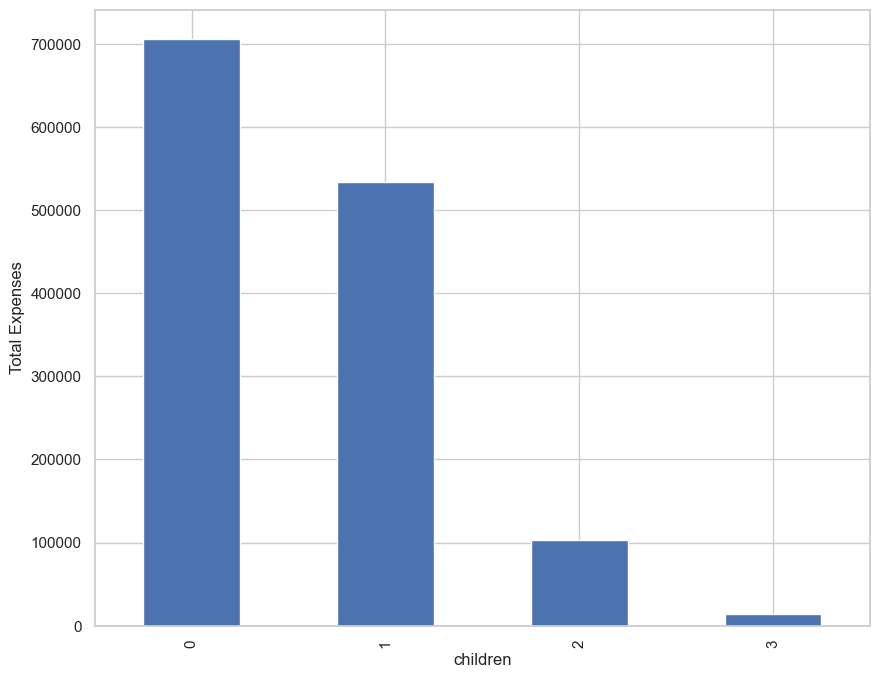

In [33]:
cx = data[['children', 'Total_Expenses']].groupby('children').sum().sort_values(by='Total_Expenses', ascending=False).plot(kind='bar', figsize=(10,8), legend=None)
cx.set_ylabel('Total Expenses')

### Larger Expenses are made by the households that have atleast 1 child.

Text(0, 0.5, 'Total Expenses')

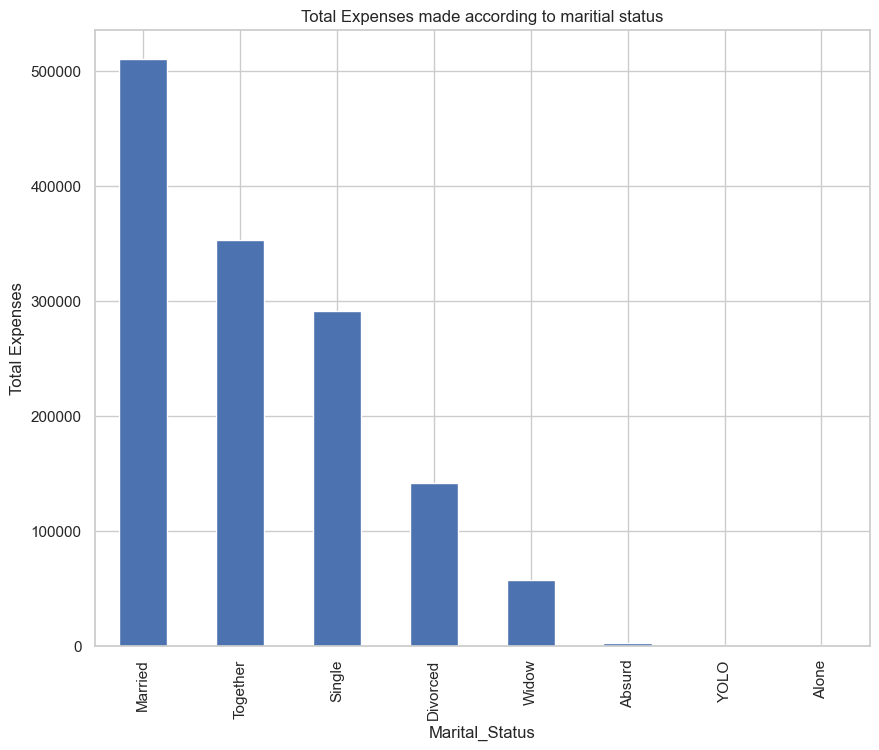

In [34]:
mx = data[['Marital_Status', 'Total_Expenses']].groupby('Marital_Status').sum().sort_values(by='Total_Expenses', ascending=False).plot(kind='bar', figsize=(10,8), legend=None)
mx.set_title('Total Expenses made according to maritial status')
mx.set_ylabel('Total Expenses')

### Married and together people contribute most expenses.

<Axes: >

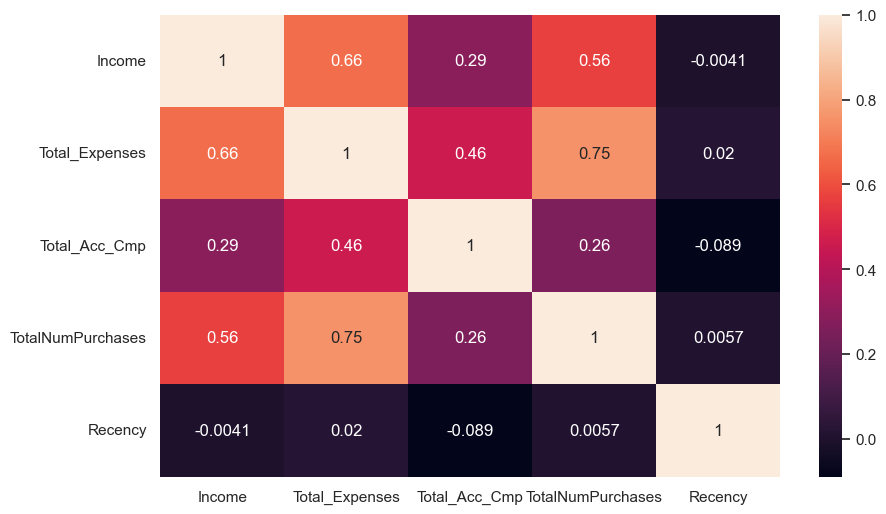

In [35]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[['Income', 'Total_Expenses', 'Total_Acc_Cmp',"TotalNumPurchases",'Recency']].corr(), annot=True)

###The highest correlation is between income and total expenses, followed by total expenses and total accepted campaign.


##Outlier Detection

In [36]:
bx_col=['Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       "Age", 'Total_Expenses',"TotalNumPurchases"]

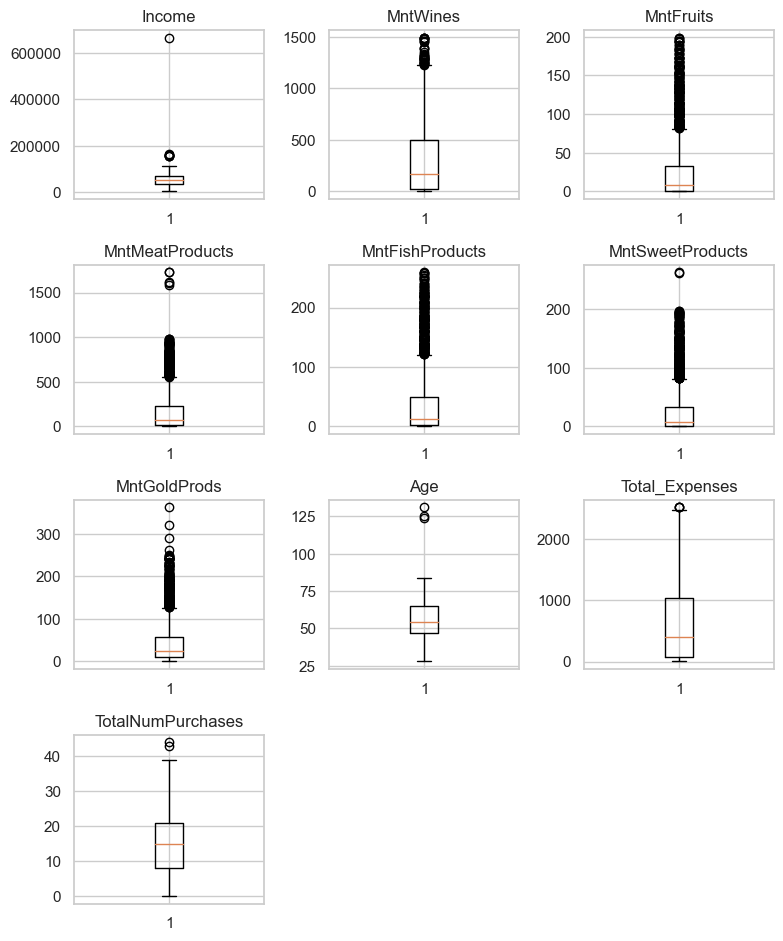

In [37]:
# Create boxplot visualizations for each numerical column
plt.figure(figsize=(8, 14))

for i, col in enumerate(bx_col, 1):
    plt.subplot(6, 3, i)
    plt.boxplot(data2[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [38]:
for col in bx_col:
    Q1 = data2[col].quantile(0.25)
    Q3 = data2[col].quantile(0.75)
    IQR = Q3-Q1
    LB = Q1-(1.5*IQR)
    UB = Q3+(1.5*IQR)
    for ind in data2[col].index:
        if data2.loc[ind,col]>UB:
            data2.loc[ind,col]=UB
        elif data2.loc[ind,col]<LB:
            data2.loc[ind,col]=LB
        else:
            pass
print("Outliers have been replaced with the threshold value.")

Outliers have been replaced with the threshold value.


In [39]:
data2.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Complain,Response,Age,Total_yearCust,Year_Joined,Month_Joined,Total_Expenses,Total_Acc_Cmp,TotalNumPurchases,children
0,Graduation,Single,58138.0,0,0,58,635,81,546,120.5,...,0,1,67,12,2012,September,1617.0,1,25.0,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2.0,...,0,0,70,10,2014,March,27.0,0,6.0,2
2,Graduation,Together,71613.0,0,0,26,426,49,127,111.0,...,0,0,59,11,2013,August,776.0,0,21.0,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10.0,...,0,0,40,10,2014,February,53.0,0,8.0,1
4,PhD,Married,58293.0,1,0,94,173,43,118,46.0,...,0,0,43,10,2014,January,422.0,0,19.0,1


#Feature Engineering

In [40]:
data2["Education1"]=data2["Education"].replace({"Basic":"Basic","2n Cycle":"Postgraduation", "Graduation":"Graduation", "Master":"Postgraduation", "PhD":"Postgraduation"})
data2["Partner"]=data2["Marital_Status"].replace({"Married":"Yes", "Together":"Yes", "Absurd":"No", "Widow":"No", "YOLO":"No", "Divorced":"No", "Single":"No","Alone":"No"})
data2['Age_Group'] = pd.cut(x = data2['Age'], bins = [24, 44, 64, 100],labels = ['Adult','Middel Aged','Senior Citizen'])
data2.drop(["Marital_Status","Education"],axis=1, inplace=True)

In [41]:
data2["Age_Group"].value_counts()

Middel Aged       1246
Senior Citizen     570
Adult              424
Name: Age_Group, dtype: int64

In [42]:
data2["Education1"].value_counts()

Graduation        1127
Postgraduation    1059
Basic               54
Name: Education1, dtype: int64

##Encoding

In [43]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data2["Month_Joined"]=label_encoder.fit_transform(data2["Month_Joined"])
data2["Partner"]=label_encoder.fit_transform(data2["Partner"])
data2["Education1"]=label_encoder.fit_transform(data2["Education1"])
data2["Age_Group"]=label_encoder.fit_transform(data2["Age_Group"])


In [44]:
data2["Age_Group"].value_counts()

1    1246
2     570
0     424
Name: Age_Group, dtype: int64

In [45]:
data2["Education1"].value_counts()

1    1127
2    1059
0      54
Name: Education1, dtype: int64

In [46]:
data2.tail()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Total_yearCust,Year_Joined,Month_Joined,Total_Expenses,Total_Acc_Cmp,TotalNumPurchases,children,Education1,Partner,Age_Group
2235,61223.0,0,1,46,709,43,182,42.0,81,126.5,...,11,2013,6,1341.0,0,18.0,1,1,1,1
2236,64014.0,2,1,56,406,0,30,0.0,0,8.0,...,10,2014,6,444.0,1,22.0,3,2,1,2
2237,56981.0,0,0,91,908,48,217,32.0,12,24.0,...,10,2014,4,1241.0,1,19.0,0,1,0,0
2238,69245.0,0,1,8,428,30,214,80.0,30,61.0,...,10,2014,4,843.0,0,23.0,1,2,1,2
2239,52869.0,1,1,40,84,3,61,2.0,1,21.0,...,12,2012,10,172.0,1,11.0,2,2,1,2


#Scaling

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
num_cols = ['Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','Age', 'Total_Expenses']
scaler = StandardScaler()
#scaler = MinMaxScaler()
scaled_data = data2.copy()
scaled_data[num_cols] = scaler.fit_transform(scaled_data[num_cols])

In [48]:
scaled_data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Total_yearCust,Year_Joined,Month_Joined,Total_Expenses,Total_Acc_Cmp,TotalNumPurchases,children,Education1,Partner,Age_Group
0,0.299651,0,0,0.307039,1.005751,2.176816,2.210169,2.190303,2.145044,1.215280,...,12,2012,11,1.679615,1,25.0,0,1,0,2
1,-0.263808,1,1,-0.383664,-0.879539,-0.758828,-0.810358,-0.746320,-0.760435,-0.838900,...,10,2014,7,-0.961340,0,6.0,2,1,0,2
2,0.943420,0,0,-0.798086,0.374300,1.002558,-0.133536,1.954878,-0.034065,0.062935,...,11,2013,1,0.282733,0,21.0,0,1,1,1
3,-1.204881,1,0,-0.798086,-0.879539,-0.648741,-0.732048,-0.548067,-0.687798,-0.863951,...,10,2014,3,-0.918154,0,8.0,1,1,1,0
4,0.307056,1,0,1.550305,-0.390089,0.782385,-0.183879,0.344072,0.183846,-0.613442,...,10,2014,4,-0.305253,0,19.0,1,2,1,0


#DBSCAN

In [49]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
# Perform DBSCAN clustering with different parameters
eps_values = [0.3, 0.4, 0.5, 0.6]
for eps in eps_values:
    for min_samples in range(2, 6):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(scaled_data)

        n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        n_noise = list(dbscan_labels).count(-1)

        # Calculate silhouette score if there are more than 1 cluster and less than 7 clusters
        if 1 < n_clusters < 7:
            silhouette_avg = silhouette_score(scaled_data, dbscan_labels)
            print(f'eps: {eps}, min_samples: {min_samples}, Estimated number of clusters: {n_clusters}, Estimated number of noise points: {n_noise}, Silhouette Score: {silhouette_avg}')


eps: 0.3, min_samples: 3, Estimated number of clusters: 6, Estimated number of noise points: 2222, Silhouette Score: -0.4396323110396607
eps: 0.4, min_samples: 3, Estimated number of clusters: 6, Estimated number of noise points: 2222, Silhouette Score: -0.4396323110396607
eps: 0.5, min_samples: 3, Estimated number of clusters: 6, Estimated number of noise points: 2222, Silhouette Score: -0.4396323110396607
eps: 0.6, min_samples: 3, Estimated number of clusters: 6, Estimated number of noise points: 2222, Silhouette Score: -0.4396323110396607


### The silhouette score for DBSCAN is consistently low across different values of epsilon (eps) and min_samples, indicating poor clustering quality. The silhouette score is negative, suggesting that the clusters are overlapping, and the data points are poorly matched to their clusters.


#K Means Clustering

##Elbow Method

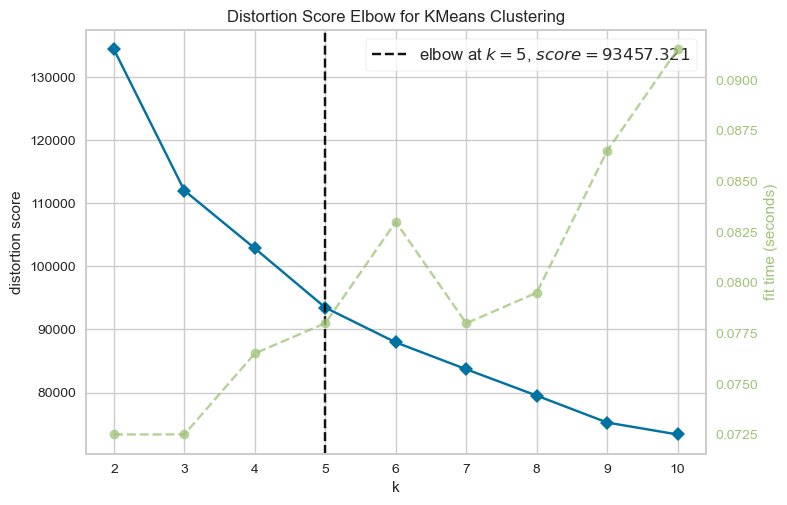

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
elbow_graph = KElbowVisualizer(KMeans(random_state=42), k=10)
elbow_graph.fit(scaled_data)
elbow_graph.show()

### Optimum no.of clusters is 5 by elbow curve with an inertia score(sum of squared distances between each data point and its nearest cluster centroid) around 93451

In [51]:
nc = range(1, 11)
l = []
for i in nc:
    kmeans_model = KMeans(n_clusters=i)
    kmeans_model.fit(scaled_data)
    l.append(kmeans_model.inertia_)
l

[273198.1459821429,
 134351.9890783322,
 111999.7618612115,
 102832.40062082419,
 93482.41967635525,
 87719.65812021462,
 83564.87034311797,
 78639.60817362224,
 75221.59207291772,
 72681.8030328536]

In [52]:
from sklearn.metrics import silhouette_score
kmeans_model=KMeans(n_clusters=5)
silhouette_score(scaled_data,kmeans_model.fit_predict(scaled_data))

0.26746024603458407

In [53]:
kmeans_model=KMeans(n_clusters=4,init='k-means++',random_state = 42)
silhouette_score(scaled_data,kmeans_model.fit_predict(scaled_data))

0.20577960191501588

In [54]:
data2['Clusters'] = kmeans_model.fit_predict(scaled_data)

In [55]:
nc=range(2,11)
l=[]
for i in nc:
  kmeans_model=KMeans(n_clusters=i)
  l.append(silhouette_score(scaled_data,kmeans_model.fit_predict(scaled_data)))

In [56]:
l

[0.42083223106319984,
 0.3026272389093196,
 0.2619684410860895,
 0.1978649916838503,
 0.19551052982861275,
 0.18921936695980834,
 0.18309303433436105,
 0.1793227965119919,
 0.17209100366092714]

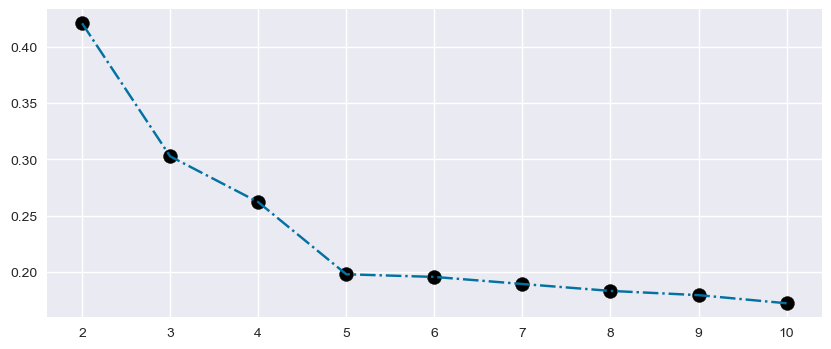

In [57]:
plt.figure(figsize=(10,4))
plt.style.use("seaborn-darkgrid")
plt.scatter(nc,l,s=100,color="black")
plt.plot(nc,l,linestyle="-.")
plt.xticks(nc)
plt.show()

### This Silhoutte score at k=4 (while not very high) suggests that K-Means is able to form somewhat distinct clusters, but there might still be some overlap or outliers. But this score is higher than the silhouette scores obtained from DBSCAN and hierarchical clustering.
### So we can conclude that k-means clustering with k=4  would likely provide better clustering results for this dataset.

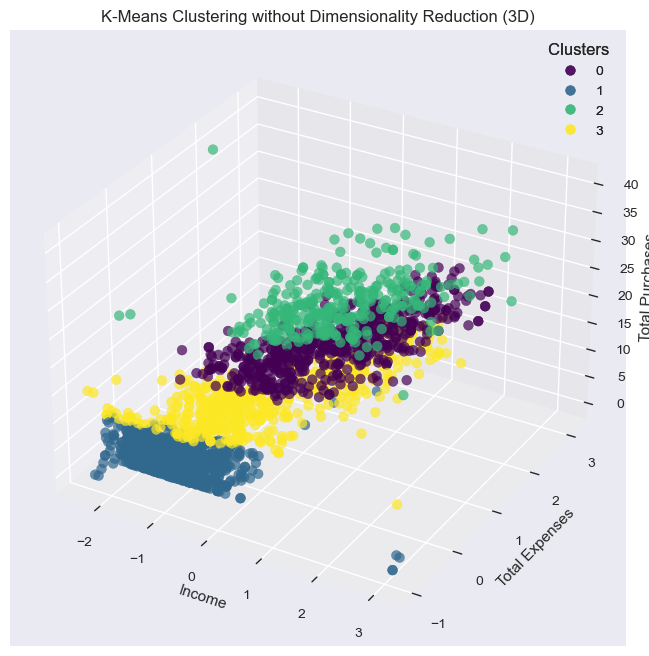

In [58]:
selected_features = ['Income', 'Total_Expenses', 'TotalNumPurchases']
X_subset = scaled_data[selected_features]
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_subset)
# Plot clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Plot data points with cluster colors
sc = ax.scatter(X_subset['Income'], X_subset['Total_Expenses'], X_subset['TotalNumPurchases'],
                c=kmeans.labels_, cmap='viridis', s=50, alpha=0.7)

ax.set_xlabel('Income')
ax.set_ylabel('Total Expenses')
ax.set_zlabel('Total Purchases')
ax.set_title('K-Means Clustering without Dimensionality Reduction (3D)')

# Add legend for clusters
legend1 = ax.legend(*sc.legend_elements(), title="Clusters ")
ax.add_artist(legend1)

plt.show()


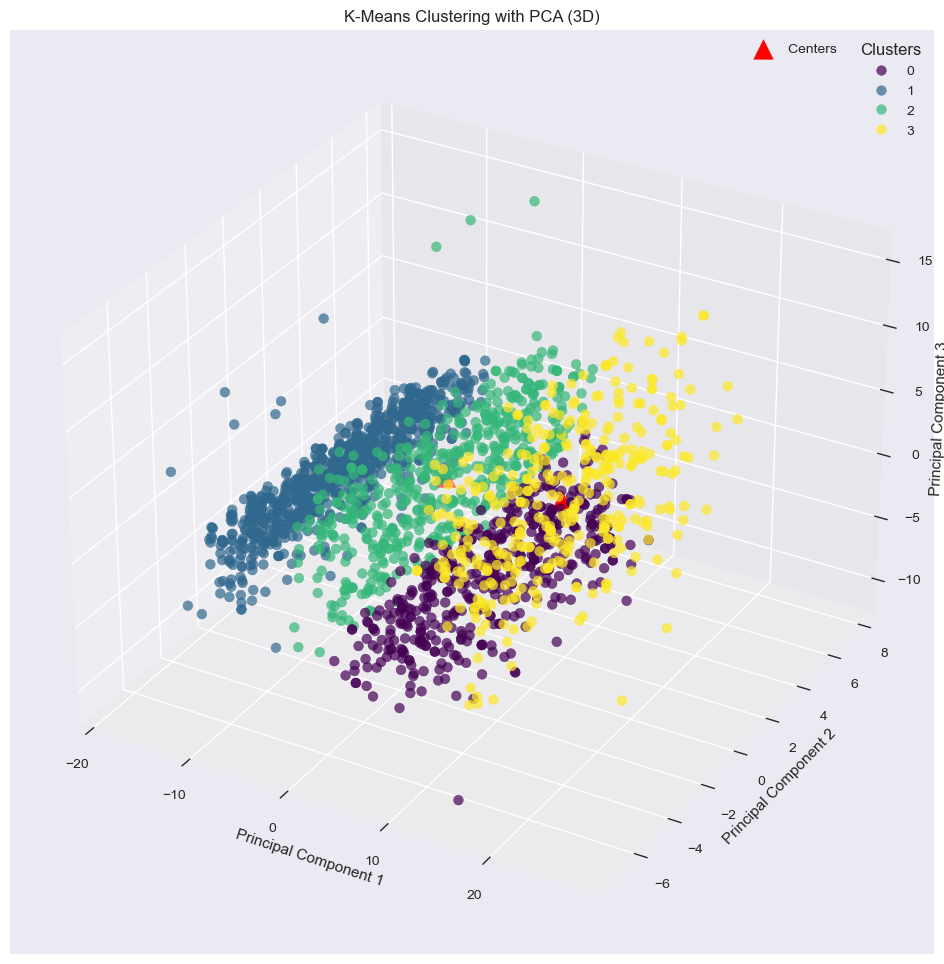

In [59]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
# Appling PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(scaled_data)
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_pca)
# Plot clusters in 3D
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
# Plot data points
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.7)

# Plot cluster centers
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           marker='^', c='red', s=200, label='Centers                      ')
legend1 = ax.legend(*sc.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('K-Means Clustering with PCA (3D)')
plt.legend()
plt.show()

In [60]:
data2["Clusters"].value_counts()

1    715
2    536
3    501
0    488
Name: Clusters, dtype: int64

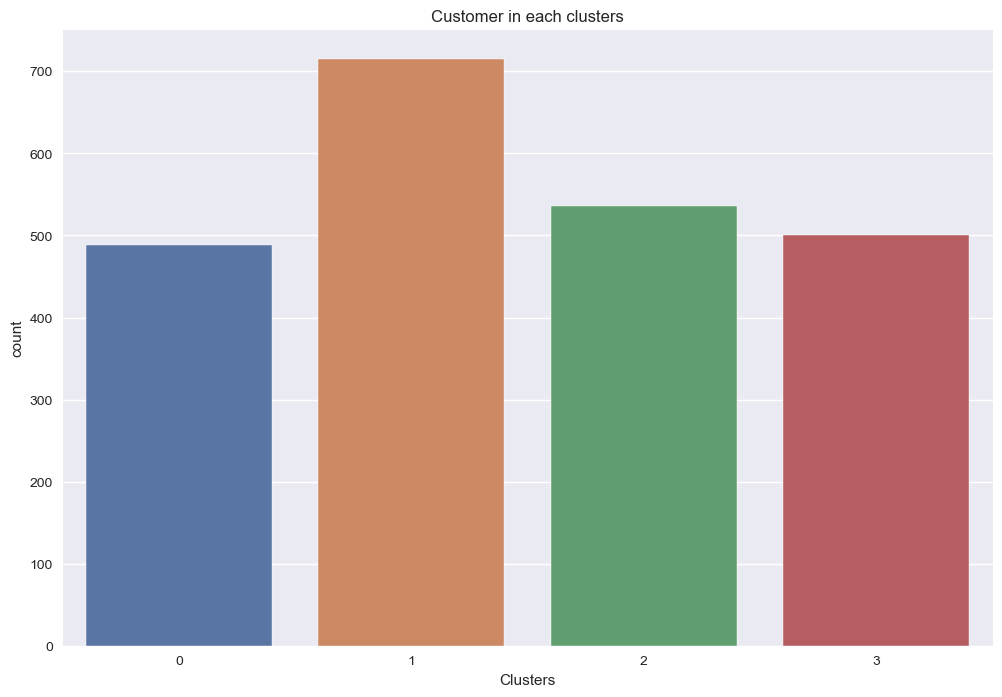

In [61]:
# count plot to see number of customers in each cluster
plt.figure(figsize=(12, 8))
sns.countplot(x='Clusters', data=data2,palette="deep")
plt.title('Customer in each clusters')
plt.show()

### Cluster 0 has the highest number of customers, followed by cluster 1.

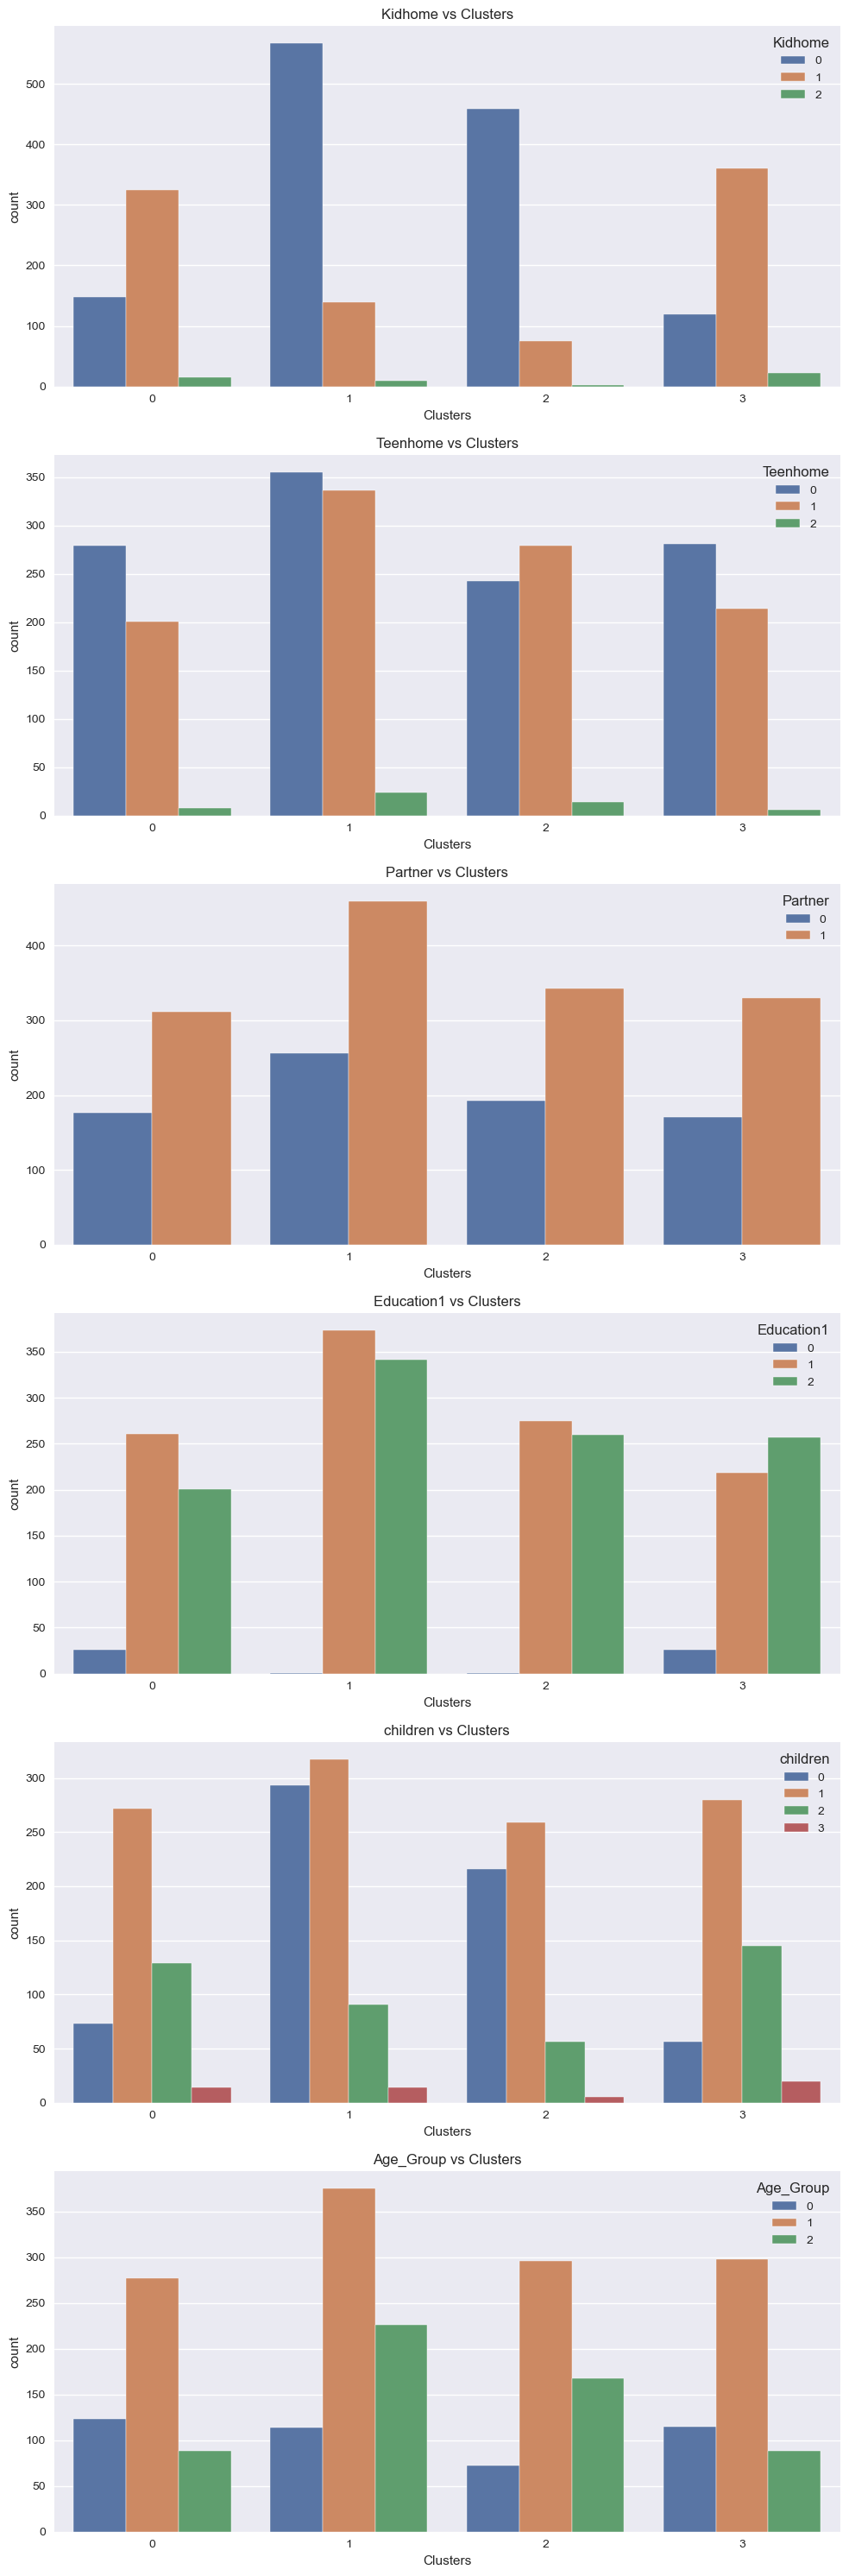

In [62]:
cols1 = ['Kidhome', 'Teenhome', 'Partner', 'Education1','children',"Age_Group"]
fig, axes = plt.subplots(len(cols1), 1, figsize=(10, 5*len(cols1)))
for i, col in enumerate(cols1):
    sns.countplot(x='Clusters', data=data2, ax=axes[i], hue=col,palette='deep')
    axes[i].set_title(f'{col} vs Clusters')
plt.tight_layout()
plt.show()

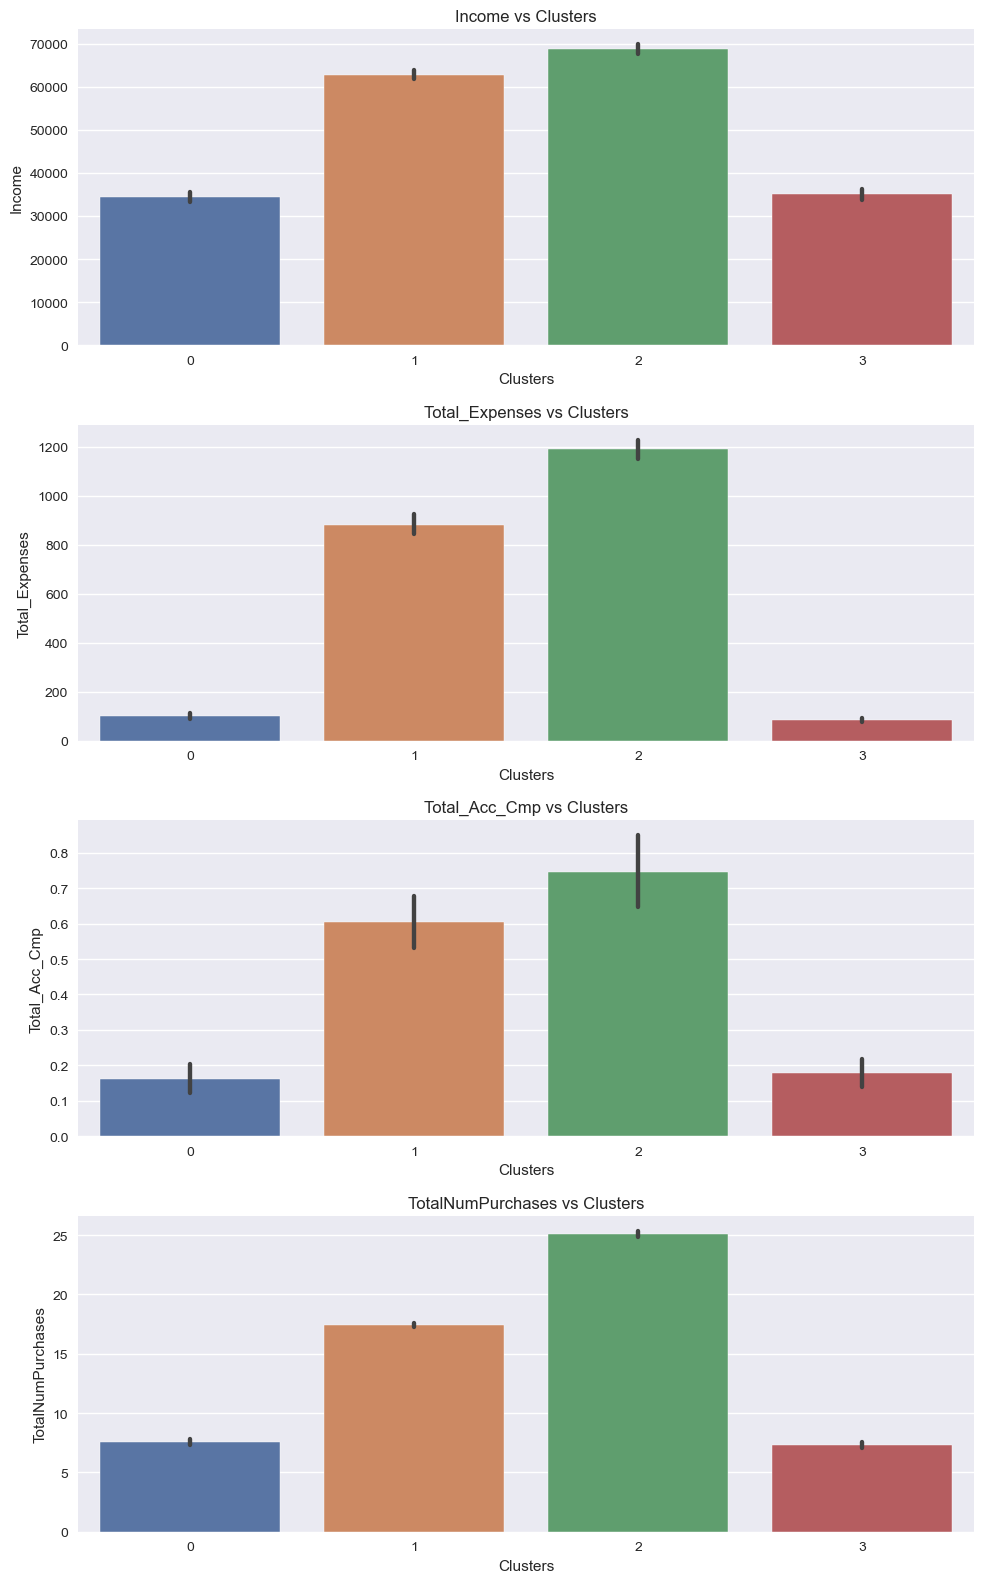

In [63]:
cols2 = ['Income', 'Total_Expenses', 'Total_Acc_Cmp', 'TotalNumPurchases']
fig, axes = plt.subplots(len(cols2), 1, figsize=(10, 4*len(cols2)))
for i, col in enumerate(cols2):
    sns.barplot(x='Clusters', y=col, data=data2, ax=axes[i],palette="deep")
    axes[i].set_title(f'{col} vs Clusters')

plt.tight_layout()
plt.show()

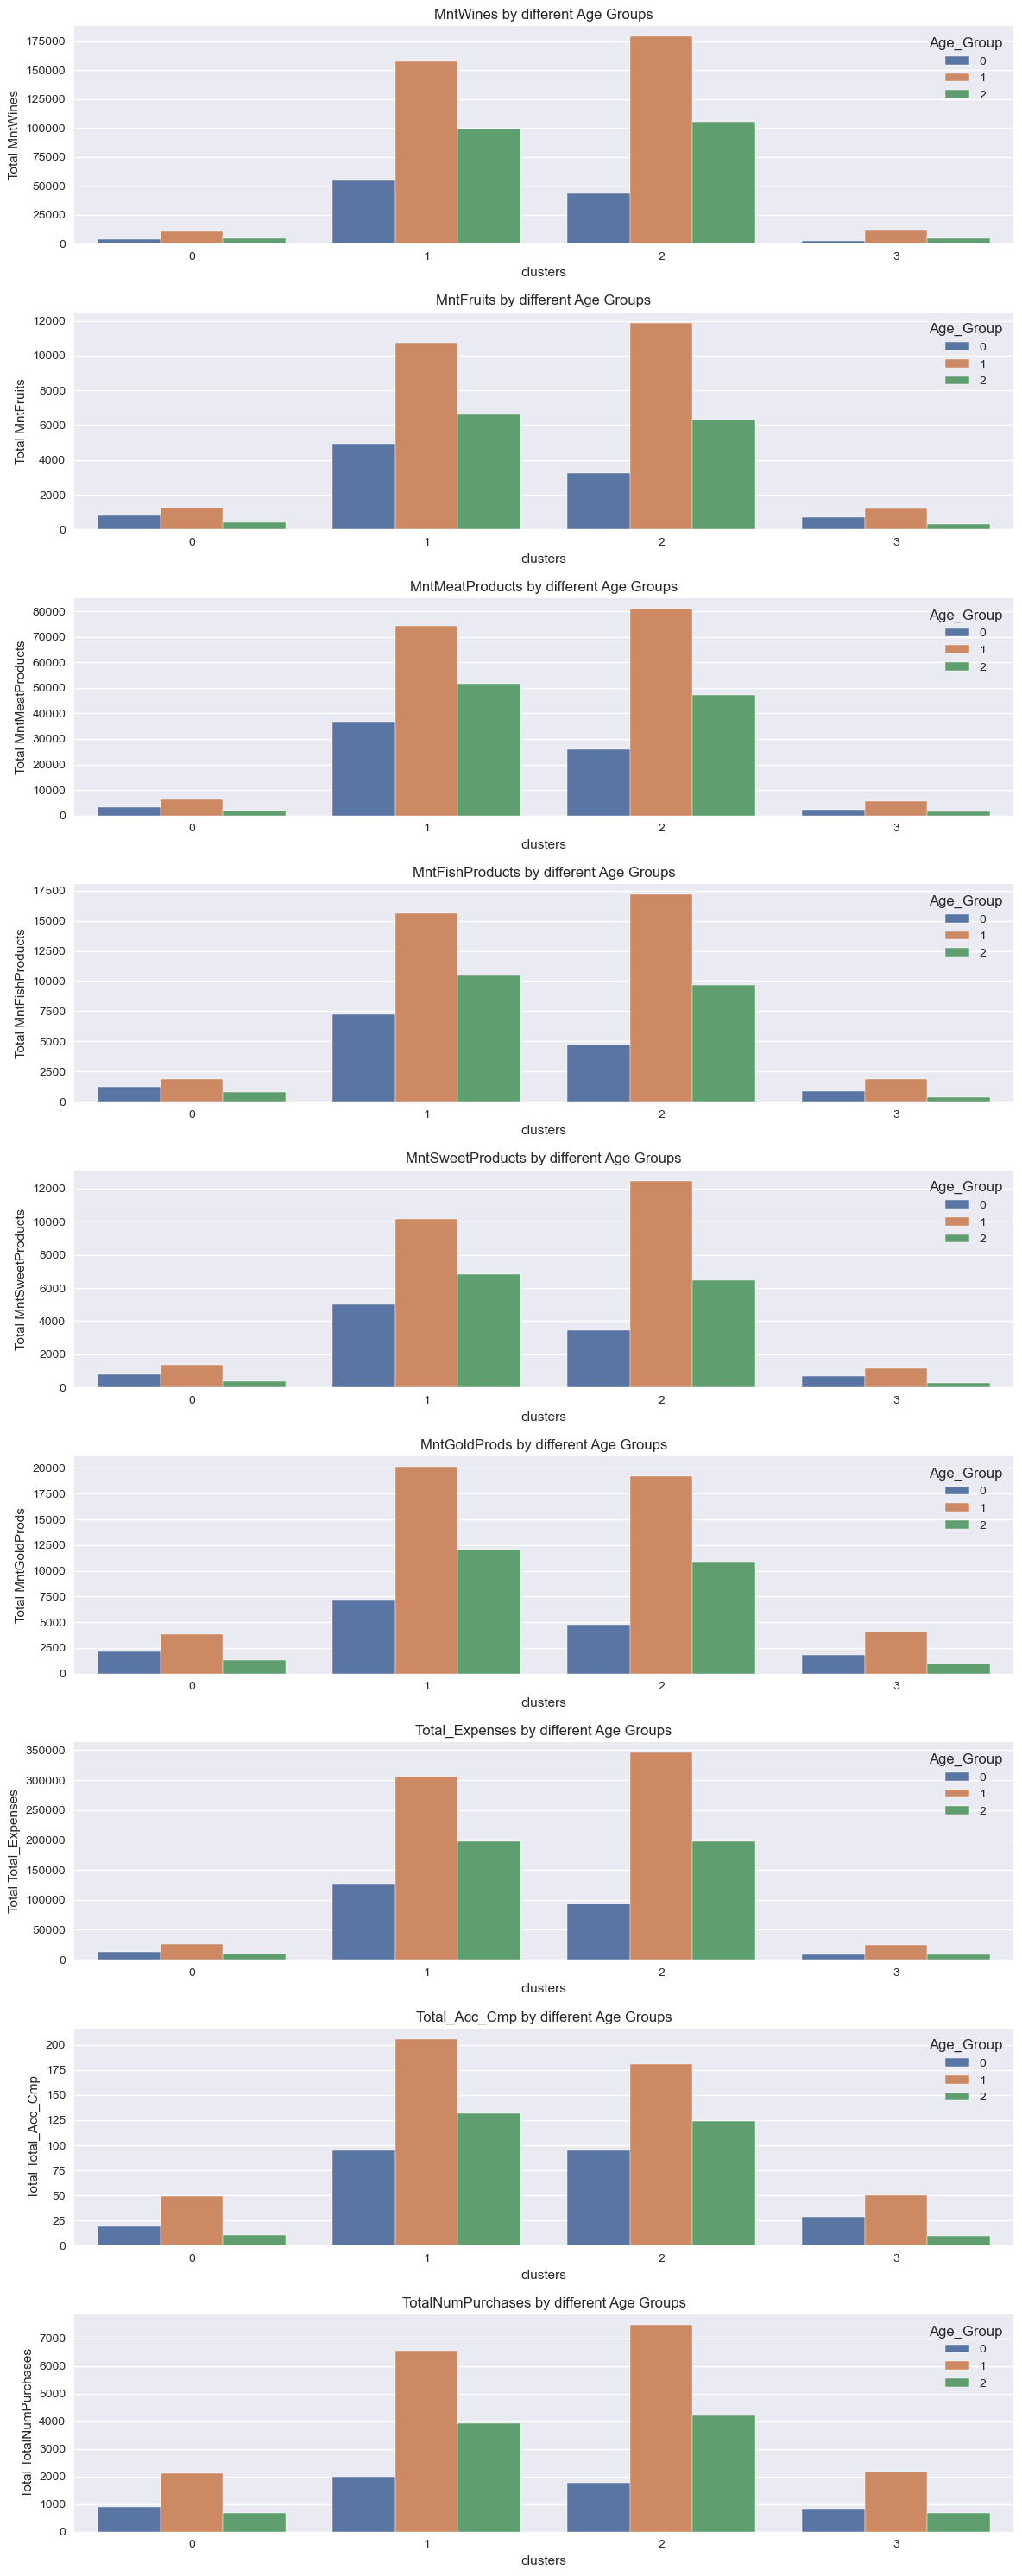

In [64]:
cols3 = ['MntWines', 'MntFruits', 'MntMeatProducts',
         'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
         'Total_Expenses', 'Total_Acc_Cmp', 'TotalNumPurchases']
age_group_spending = data2.groupby([ 'Clusters','Age_Group'])[cols3].sum().reset_index()
fig, axes = plt.subplots(len(cols3), 1, figsize=(12, 30))
for i, col in enumerate(cols3):
    sns.barplot(x='Clusters', y=col, hue='Age_Group', data=age_group_spending, ax=axes[i], palette='deep')
    axes[i].set_title(f'{col} by different Age Groups')
    axes[i].set_xlabel('clusters')
    axes[i].set_ylabel(f'Total {col}')

plt.tight_layout()
plt.show()


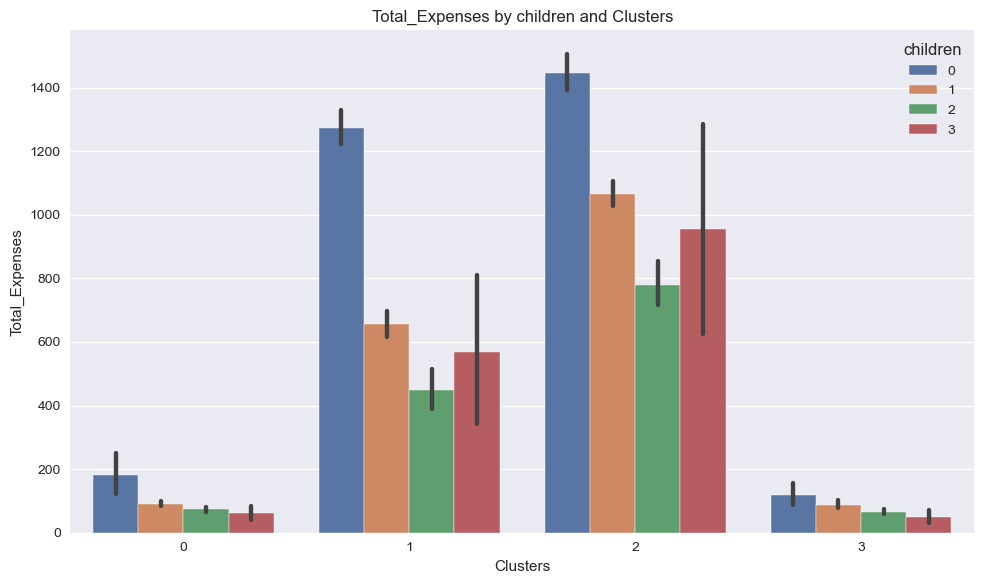

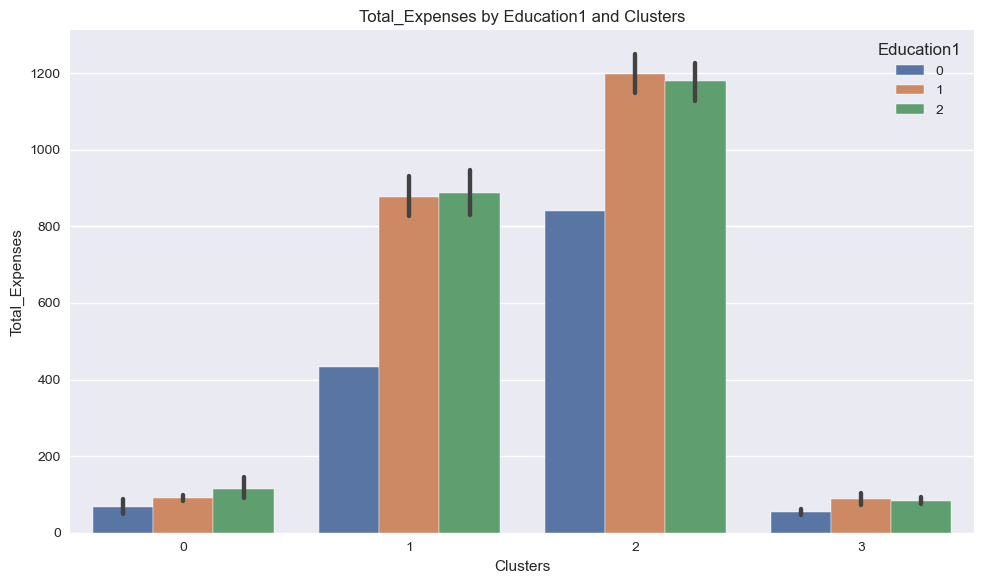

In [65]:
cols4 = ["children", 'Education1']
for col in cols4:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Clusters', y='Total_Expenses', data=data2, hue=col, palette="deep")
    plt.title(f'Total_Expenses by {col} and Clusters')
    plt.xlabel('Clusters')
    plt.ylabel('Total_Expenses')
    plt.legend(title=col)
    plt.tight_layout()

plt.show()


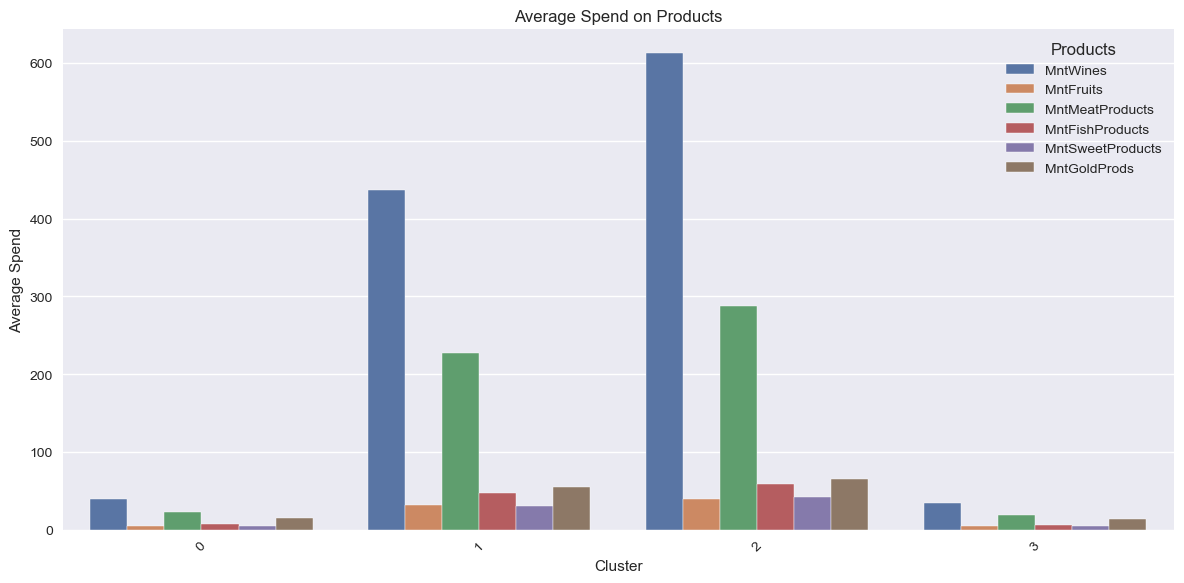

In [66]:
cols5 = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cluster_means = data2.groupby('Clusters')[cols5].mean().reset_index()
# Melt the DataFrame for easier plotting
melted_df = cluster_means.melt(id_vars='Clusters', var_name='Product', value_name='Mean_Spend')
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='Clusters', y='Mean_Spend', hue='Product', palette='deep')
plt.title('Average Spend on Products')
plt.xlabel('Cluster')
plt.ylabel('Average Spend')
plt.legend(title='Products', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

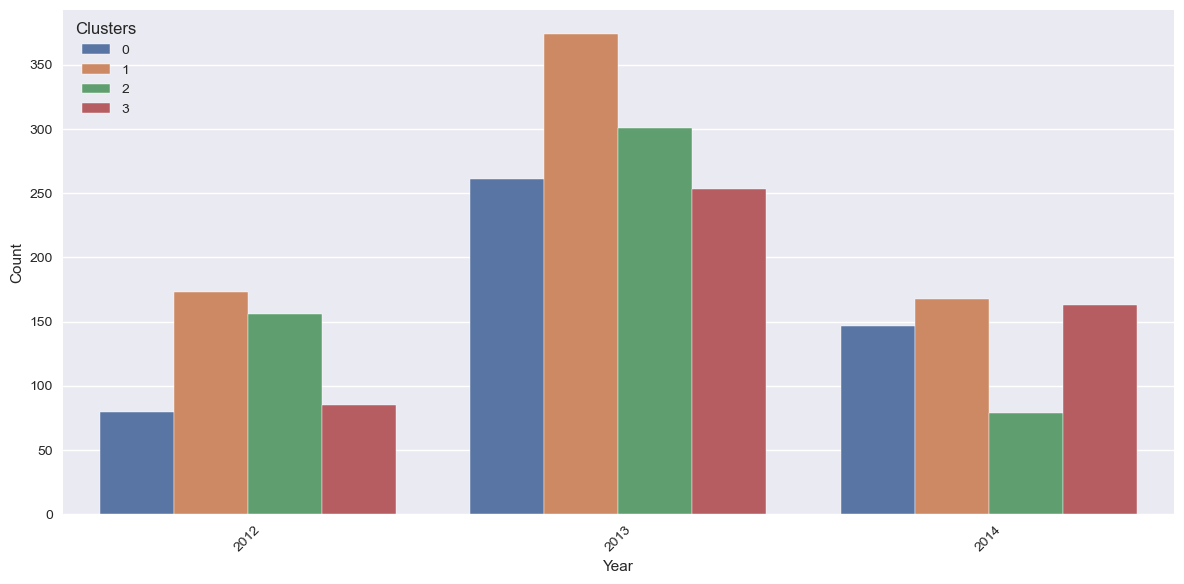

In [67]:
# Plot the distribution of 'Year_Joined' by cluster using a bar plot
plt.figure(figsize=(12, 6))
sns.countplot(data=data2, x='Year_Joined', hue='Clusters', palette='deep')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Clusters', loc='upper left')
plt.tight_layout()
plt.show()


### Majority of the customers are joined in the year 2013.

##Obsevations:
Cluster 0:
* Highest no.of customers
* Most of the households have atleast one kid.
* Majority of the households doesnt have any teens
* With or with out partner.
* Most of them have atleast one or two child.
* Majority of them did thet graduation and postgraduation, very few did their basic education.
* Low income
* Low Expenditure
* Very less purchases
* Very less accepted campaign
* Expenses on different categories are done  more by middle aged people.
* Higher expenses are made by households having no children.
* Post graduate people does higher expenses.




Cluster 1:
* Second highest no. of customers
* Most of the households doesnt have any kids.
* Majority of the households  have atleast one teen.
* With or with out partner.
* Majority of them atleast one child.
* Majority of them did thet graduation and postgraduation
* Income below 60000
* Low Expenditure
* Less spending on wines, fruits etc.
* Less than 20 purchases
* Very less accepted campaign
* Expenses on different categories are done  more by middle aged people.
* Higher expenses are made by households having no children.
* Post graduate people does higher expenses.

Cluster 2:
* Most of the households doesnt have any kids.
* Majority of the households doent have any teens.
* With or with out partner.
* Well Educated
* Mostly Middle aged people, followed by equal no. senior citizens and adults.
* Cluster with the highest income
* High Expenditure
* High spending on wines
* High spending on meat products when compared to other clusters.
* More than 20 purchases
* Accepted alot of campaigns


Cluster 3:
* Most of the households doesnt have any kids.
* Majority of the households have atlesast one teen.
* With or with out partner.
* Well Educated
* Mostly Middle aged people and senior citizens.
* high income
* High Expenditure
* Highest spending on wines
* High spending on meat prods.
* More than 25 purchases
* Accepted alot of campaigns

## **Model Building**

In [68]:
data2.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Year_Joined,Month_Joined,Total_Expenses,Total_Acc_Cmp,TotalNumPurchases,children,Education1,Partner,Age_Group,Clusters
0,58138.0,0,0,58,635,81,546,120.5,81,88.0,...,2012,11,1617.0,1,25.0,0,1,0,2,2
1,46344.0,1,1,38,11,1,6,2.0,1,6.0,...,2014,7,27.0,0,6.0,2,1,0,2,3
2,71613.0,0,0,26,426,49,127,111.0,21,42.0,...,2013,1,776.0,0,21.0,0,1,1,1,2
3,26646.0,1,0,26,11,4,20,10.0,3,5.0,...,2014,3,53.0,0,8.0,1,1,1,0,0
4,58293.0,1,0,94,173,43,118,46.0,27,15.0,...,2014,4,422.0,0,19.0,1,2,1,0,1


In [69]:
print(data2.shape)
print(data2["Clusters"].value_counts())

(2240, 34)
1    715
2    536
3    501
0    488
Name: Clusters, dtype: int64


In [70]:
x=data2.iloc[:,:-1]
y=data2.iloc[:,-1]

#Train Test Split

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.25)
x_train.shape, x_test.shape

((1680, 33), (560, 33))

## KNN Model

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

# Predictions on the test set
y_pred = knn_model.predict(x_test)

# Calculate training accuracy
train_accuracy1 = knn_model.score(x_train, y_train)
print("Training Accuracy:", train_accuracy1)

# Calculate testing accuracy
test_accuracy1 = knn_model.score(x_test, y_test)
print("Testing Accuracy:", test_accuracy1)

# Evaluate the model
cm1 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Training Accuracy: 0.700595238095238
Testing Accuracy: 0.5196428571428572
Confusion Matrix:
 [[50  7  1 48]
 [17 93 71  6]
 [ 1 45 87  0]
 [65  6  2 61]]

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.47      0.42       106
           1       0.62      0.50      0.55       187
           2       0.54      0.65      0.59       133
           3       0.53      0.46      0.49       134

    accuracy                           0.52       560
   macro avg       0.52      0.52      0.51       560
weighted avg       0.53      0.52      0.52       560




#Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
# Initialize and train the Logistic Regression model
log_model = LogisticRegression(random_state=42)
log_model.fit(x_train, y_train)
# Predictions on the test set
y_pred = log_model.predict(x_test)
# Calculate training accuracy
train_accuracy2 = log_model.score(x_train, y_train)
print("Training Accuracy:", train_accuracy2)
# Calculate testing accuracy
test_accuracy2 = log_model.score(x_test, y_test)
print("Testing Accuracy:", test_accuracy2)
# Evaluate the model
cm2 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Training Accuracy: 0.5636904761904762
Testing Accuracy: 0.5410714285714285
Confusion Matrix:
 [[ 71   5   0  30]
 [  5 126  55   1]
 [  0  81  52   0]
 [ 77   3   0  54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.67      0.55       106
           1       0.59      0.67      0.63       187
           2       0.49      0.39      0.43       133
           3       0.64      0.40      0.49       134

    accuracy                           0.54       560
   macro avg       0.54      0.53      0.53       560
weighted avg       0.55      0.54      0.53       560



#Decision  Tree Model

In [75]:
from sklearn.tree import DecisionTreeClassifier
# Initialize and train the Decision Tree Classifier
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
# Predictions on the test set
y_pred = model_DT.predict(x_test)
# Calculate training accuracy
train_accuracy3 = model_DT.score(x_train, y_train)
print("Training Accuracy:", train_accuracy3)
# Calculate testing accuracy
test_accuracy3 = model_DT.score(x_test, y_test)
print("Testing Accuracy:", test_accuracy3)
# Evaluate the model
cm3 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 1.0
Testing Accuracy: 0.9785714285714285
Confusion Matrix:
 [[105   1   0   0]
 [  2 179   2   4]
 [  0   2 131   0]
 [  0   1   0 133]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       106
           1       0.98      0.96      0.97       187
           2       0.98      0.98      0.98       133
           3       0.97      0.99      0.98       134

    accuracy                           0.98       560
   macro avg       0.98      0.98      0.98       560
weighted avg       0.98      0.98      0.98       560



#Random Forest Model

In [76]:
from sklearn.ensemble import RandomForestClassifier
# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)
# Predictions on the test set
y_pred = rf_classifier.predict(x_test)
# Calculate training accuracy
train_accuracy4 = rf_classifier.score(x_train, y_train)
print("Training Accuracy:", train_accuracy4)
# Calculate testing accuracy
test_accuracy4 = rf_classifier.score(x_test, y_test)
print("Testing Accuracy:", test_accuracy4)
# Evaluate the model
cm4 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 1.0
Testing Accuracy: 0.9910714285714286
Confusion Matrix:
 [[104   2   0   0]
 [  1 186   0   0]
 [  0   2 131   0]
 [  0   0   0 134]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       106
           1       0.98      0.99      0.99       187
           2       1.00      0.98      0.99       133
           3       1.00      1.00      1.00       134

    accuracy                           0.99       560
   macro avg       0.99      0.99      0.99       560
weighted avg       0.99      0.99      0.99       560



#XGBoost Model

In [77]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
# Initialize and train the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.2,reg_alpha=1, reg_lambda=1)
xgb_classifier.fit(x_train, y_train)
# Predictions on the test set
y_pred = xgb_classifier.predict(x_test)
# Predictions on the training set
y_train_pred = xgb_classifier.predict(x_train)
# Calculate training accuracy
train_accuracy5 = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy5)

# Perform cross-validation
cv_scores = cross_val_score(xgb_classifier, x_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
# Predictions on the test set
y_pred = xgb_classifier.predict(x_test)
# Calculate testing accuracy
test_accuracy5 = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", test_accuracy5)
# Generate confusion matrix
cm5 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm5)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 1.0
Cross-Validation Scores: [0.97916667 0.98214286 0.98214286 0.98809524 0.99404762]
Mean CV Score: 0.9851190476190477
Testing Accuracy: 0.9857142857142858
Confusion Matrix:
 [[105   1   0   0]
 [  1 183   2   1]
 [  0   2 131   0]
 [  0   1   0 133]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       106
           1       0.98      0.98      0.98       187
           2       0.98      0.98      0.98       133
           3       0.99      0.99      0.99       134

    accuracy                           0.99       560
   macro avg       0.99      0.99      0.99       560
weighted avg       0.99      0.99      0.99       560



#CatBoost Model

In [78]:
from catboost import CatBoostClassifier
# Create CatBoost classifier
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=2,loss_function='MultiClass', l2_leaf_reg=3)
# Train the model
catboost_model.fit(x_train, y_train,  eval_set=(x_test, y_test), early_stopping_rounds=10)

0:	learn: 1.2188200	test: 1.2130474	best: 1.2130474 (0)	total: 153ms	remaining: 15.2s
1:	learn: 1.0972340	test: 1.0875602	best: 1.0875602 (1)	total: 154ms	remaining: 7.57s
2:	learn: 0.9721074	test: 0.9618222	best: 0.9618222 (2)	total: 156ms	remaining: 5.03s
3:	learn: 0.8890208	test: 0.8754684	best: 0.8754684 (3)	total: 157ms	remaining: 3.77s
4:	learn: 0.8004662	test: 0.7887320	best: 0.7887320 (4)	total: 158ms	remaining: 3.01s
5:	learn: 0.7439248	test: 0.7309580	best: 0.7309580 (5)	total: 160ms	remaining: 2.5s
6:	learn: 0.6875127	test: 0.6751089	best: 0.6751089 (6)	total: 161ms	remaining: 2.14s
7:	learn: 0.6350366	test: 0.6226291	best: 0.6226291 (7)	total: 162ms	remaining: 1.86s
8:	learn: 0.5910038	test: 0.5767377	best: 0.5767377 (8)	total: 163ms	remaining: 1.65s
9:	learn: 0.5447604	test: 0.5314791	best: 0.5314791 (9)	total: 165ms	remaining: 1.48s
10:	learn: 0.5085672	test: 0.4957720	best: 0.4957720 (10)	total: 166ms	remaining: 1.34s
11:	learn: 0.4773459	test: 0.4648069	best: 0.4648069 

In [79]:
# Predict on test data
y_pred = catboost_model.predict(x_test)
# Predictions on the training set
y_train_pred = catboost_model.predict(x_train)
# Calculate training accuracy
train_accuracy6 = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy6)
# Calculate testing accuracy
test_accuracy6 = catboost_model.score(x_test, y_test)
print("Testing Accuracy:", test_accuracy6)
# Evaluate the model
cm6 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Training Accuracy: 0.9886904761904762
Testing Accuracy: 0.9892857142857143
Confusion Matrix:
 [[105   1   0   0]
 [  1 185   1   0]
 [  0   2 131   0]
 [  0   1   0 133]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       106
           1       0.98      0.99      0.98       187
           2       0.99      0.98      0.99       133
           3       1.00      0.99      1.00       134

    accuracy                           0.99       560
   macro avg       0.99      0.99      0.99       560
weighted avg       0.99      0.99      0.99       560



#Model Conclusion

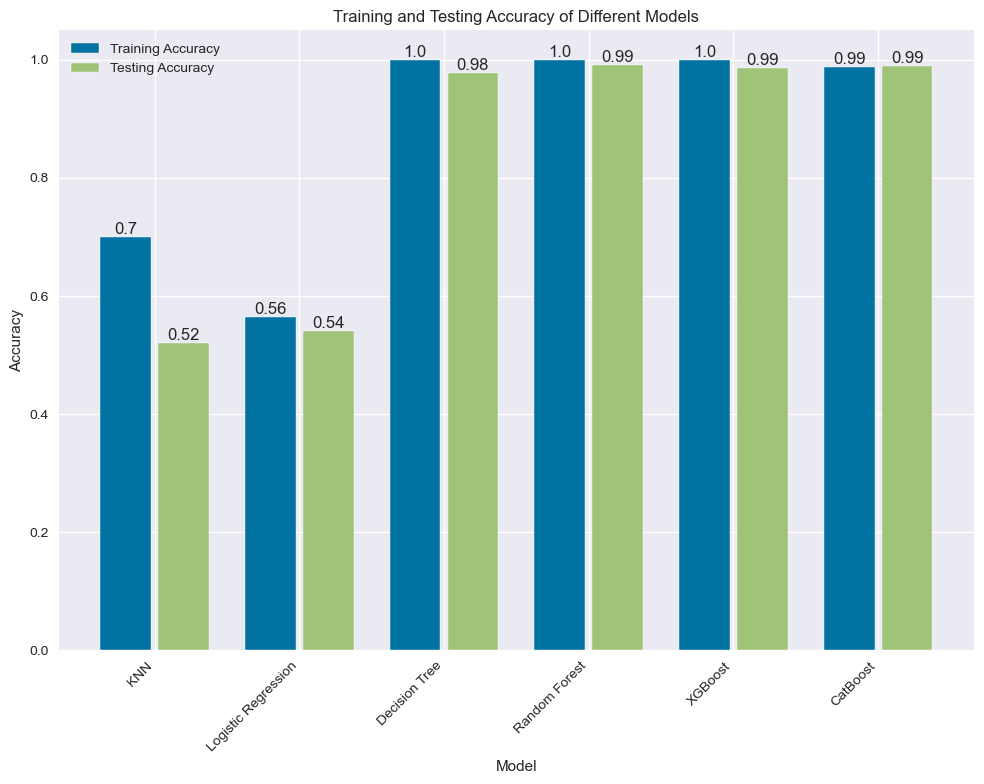

In [80]:
data3 = {
   'Model': ["KNN", "Logistic Regression", "Decision Tree", "Random Forest", "XGBoost","CatBoost"],
    'Training Accuracy': [train_accuracy1, train_accuracy2, train_accuracy3, train_accuracy4, train_accuracy5, train_accuracy6],
    'Testing Accuracy': [test_accuracy1, test_accuracy2, test_accuracy3, test_accuracy4, test_accuracy5, test_accuracy6]
}

plt.figure(figsize=(10, 8))

# Position of bars on x-axis
x_pos = np.arange(len(data3['Model']))

# Plotting bars
bar_width = 0.35
bars1 = plt.bar(x_pos - 0.2, data3['Training Accuracy'], width=bar_width, label='Training Accuracy')
bars2 = plt.bar(x_pos + 0.2, data3['Testing Accuracy'], width=bar_width, label='Testing Accuracy')

# Add values on bars
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Training and Testing Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(x_pos, data3['Model'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

### CatBoost shows the best balance between training and testing accuracy, with training accuracy at 0.98 and testing accuracy at 0.95. This suggests that CatBoost is generalizing well and is likely the most robust model among those compared.

### XGBoost also shows a good balance. Despite the overfitting, the testing accuracy of 0.96 is very high, indicating that the model still performs well on unseen data. This suggests that, while the model is overfitting, it retains a strong predictive power.

#Deployment

In [81]:
import pickle

pickle.dump(xgb_classifier, open('XGBoostModel.pkl','wb'))